In [1]:
# Import necessary libraries
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.colors as mcolors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature
import matplotlib.path as mpath


## Load in some data


In [270]:

#load maps
ocean_50m = cfeature.NaturalEarthFeature('physical', 'ocean', '50m',edgecolor='lightblue',facecolor='white') # 10m, 50m, 110m # edgecolor lightblue
land_50m = cfeature.NaturalEarthFeature('physical', 'land', '50m',edgecolor='none',facecolor='none') # 10m, 50m, 110m
ice_shelf_poly = cfeature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_polys', '50m',edgecolor='none',facecolor='white') # 10m, 50m, 110m
ice_shelf_line = cfeature.NaturalEarthFeature('physical', 'antarctic_ice_shelves_lines', '50m',edgecolor='black',facecolor='none') # 10m, 50m, 110m

data = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/Y/'+str(year))
data = data.assign_coords(lat_index=("lat_index", data.lat_index.values))

basins = xr.open_mfdataset('/pl/active/ATOC_SynopticMet/data/ar_data/Research3/Data/AIS_basins_Zwally_MERRA2grid.nc').sel(lat = slice(-90,-60)).load()
basins = basins.Zwallybasins > 0


## Select year and timestep within year

In [272]:
year = 2011
timestep = 689 # 2002,1269




## Quicklook

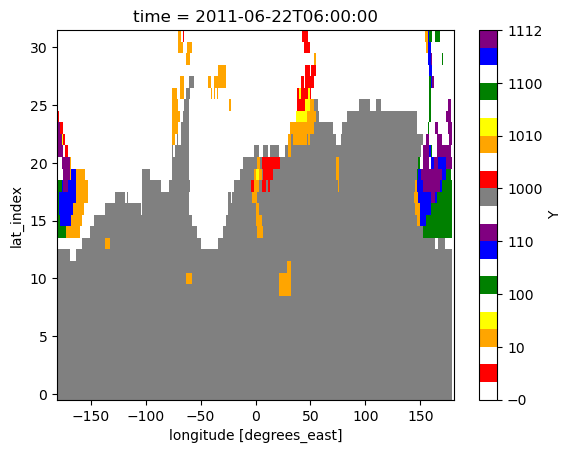

In [273]:

timestep_data = data.isel(time = timestep).load()

xr.plot.pcolormesh(timestep_data.Y, levels = [-.5,.5,1.5,9.5,10.5,11.5,99.5, 100.5, 109.5,110.5,111.5, 999.5,
                                      1000.5, 1001.5, 1009.5,1010.5,1011.5, 1099.5, 1100.5, 1109.5,1110.5,1111.5,], 
                   colors = ['none','red','none','orange','yellow','none','green','none','blue','purple', 'none', 
                             'grey','red','none','orange','yellow','none','green','none','blue','purple', 'none'],
                  )




# Nicer plot (Takes some time to run)

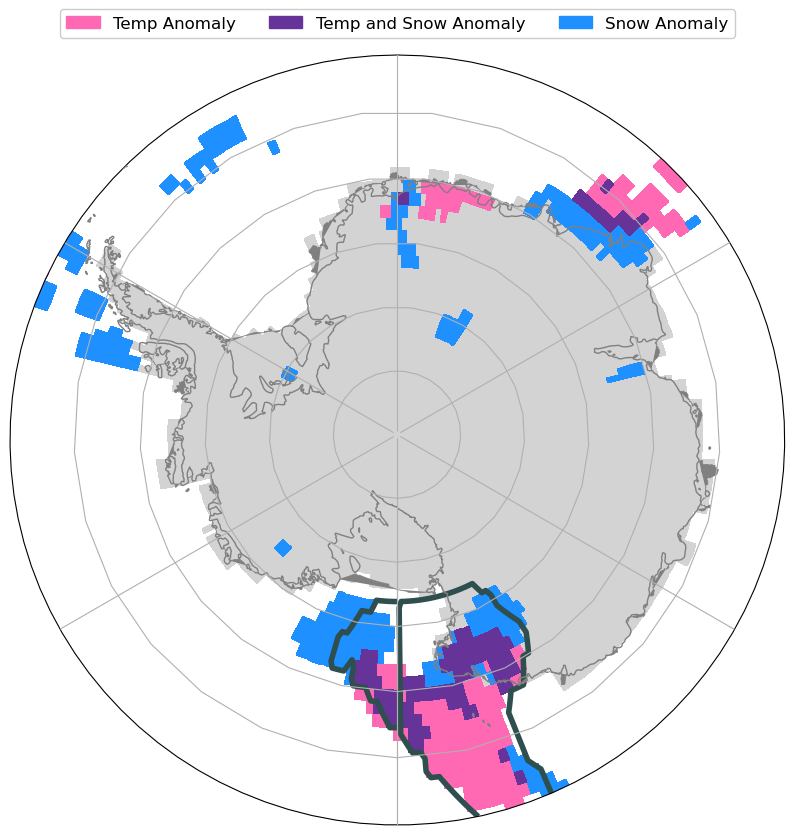

In [276]:

fig, ax=plt.subplots(ncols=1,nrows=1,figsize=(10,10),subplot_kw={'projection': ccrs.SouthPolarStereo(central_longitude=0)})


ax.set_extent([-180, 180, -90, -60], ccrs.PlateCarree())
theta = np.linspace(0, 2*np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)
grid=ax.gridlines(zorder = 20)
grid.n_steps=30


# continent mask
labels1 = ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, xr.where((timestep_data>=1000),1,np.nan ).Y,cmap = ListedColormap(["lightgrey"]), 
                        transform=ccrs.PlateCarree(), rasterized = True)

# temp
ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, 
                        xr.where(timestep_data.isin([1,101,1001, 1101]),1,np.nan ).Y,
                        cmap = ListedColormap(["hotpink"]),transform=ccrs.PlateCarree(), rasterized = True)
# snow
ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, 
                        xr.where(timestep_data.isin([10,110,1010, 1110]),1,np.nan ).Y,
                        cmap = ListedColormap(["dodgerblue"]),transform=ccrs.PlateCarree(), rasterized = True)
# temp and snow
ax.pcolormesh(timestep_data.Y.lon,timestep_data.Y.lat, 
                        xr.where(timestep_data.isin([11,111,1011, 1111]),1,np.nan ).Y,
                        cmap = ListedColormap(["rebeccapurple"]),transform=ccrs.PlateCarree(), rasterized = True)
                   
# AR outline
ax.contour(timestep_data.Y.lon, timestep_data.Y.lat, xr.where((((timestep_data>=100) & (timestep_data<200)) | ((timestep_data>=1100) & (timestep_data<1200))) ,1,0).Y,
           levels = [-.5,.5], colors = 'darkslategrey', linewidths  = 4,transform=ccrs.PlateCarree())


rect = lambda color: plt.Rectangle((0,0),1,1, color=color)
legend = ax.legend([rect('hotpink'), 
                    rect('rebeccapurple'),
                    rect('dodgerblue')], 
                   ["Temp Anomaly","Temp and Snow Anomaly", "Snow Anomaly"], 
                   loc = 'upper center', bbox_to_anchor=(0.5, 1.07),
                   ncol = 3,framealpha = 1, fontsize = 12)

ax.coastlines(resolution='50m', color = 'grey',linewidth = 1,zorder = 11)
ax.add_feature(ice_shelf_line, color = 'grey', linewidth = .5,zorder = 11)
plt.savefig('Y_data_example.png', dpi = 300,facecolor = 'white', transparent=True, bbox_inches = 'tight') 


In [2]:
Y = pd.read_csv('/rc_scratch/reba1583/Y_data/AR_lonslice.csv', index_col = False)
Y = np.array(Y['0'])
Y

array([0, 0, 0, ..., 5, 0, 0])

In [3]:
len(Y)

58440

<BarContainer object of 10 artists>

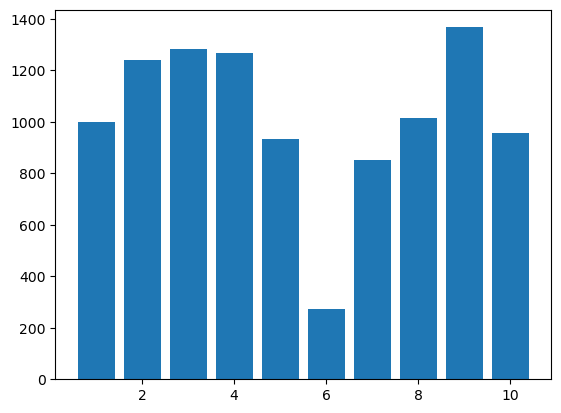

In [23]:
plt.bar(np.arange(1,11,1),(len(Y[Y==1]), len(Y[Y==2]), len(Y[Y==3]), len(Y[Y==4]), len(Y[Y==5]), len(Y[Y==6]), len(Y[Y==7]) , len(Y[Y==8]), len(Y[Y==9]), len(Y[Y==10])))

In [20]:
(10186+1367)*.7

8087.099999999999

In [8]:
6*365.25*39

85468.5

In [9]:
3056/.15

20373.333333333336